In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
class Agent (object):
    def __init__(self, unique_id, i_wealth, N):
        self.id = unique_id
        self.wealth = i_wealth
        self.N = N
        self.other_agents = self.OtherAgents()
        
    def OtherAgents (self):
        lst = []
        for i in range(self.N):
            if self.id != i:
                lst.append(i)
        return lst
    
    def GiveMoney(self):
        # Select agent to give money
        agent2give = np.random.choice(self.other_agents)
        self.wealth = self.wealth - 1
        return agent2give
    
    def Receive (self):
        self.wealth = self.wealth + 1
        

In [3]:
# Creating agents
N = 10
wealth = 1
agents = []
for i in range(N):
    unique_id = i
    agents.append(Agent(unique_id, wealth, N))

# Starting game
run_data = np.arange(N)
runs = 500
steps = 100
for k in range(runs):
    for i in range(steps):
        # Initialize agents Rrandomly
        np.random.shuffle(agents)

        # Tick
        for agent in agents:
            receiver = agent.GiveMoney()
            agents[receiver].Receive()

    # Data collection
    data = np.zeros((N,2))
    for i in range(len(agents)):
        data[i,0] = agents[i].id
        data[i,1] = agents[i].wealth

    # Sort array
    d = data[data[:,0].argsort()][:,1]
    run_data = np.vstack((run_data, d))

In [4]:
# x = range(N)
# plt.bar(data[:,0], data[:,1])
# plt.xlabel('Agents id')
# plt.ylabel('Whealth')
# plt.title('Random Wealth Game')
# plt.grid(True)
# plt.show()

In [5]:
df = pd.DataFrame(data=run_data[1:,:])
# df.head()

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-30.732000,-78.61400,62.06200,-126.930000,-22.392000,-24.550000,-118.460000,236.106000,-53.320000,166.830000
std,58.146799,48.51148,50.06555,61.479758,45.346079,72.953327,51.550085,132.796614,129.951809,163.294861
min,-160.000000,-209.00000,-48.00000,-268.000000,-154.000000,-202.000000,-210.000000,-28.000000,-365.000000,-121.000000
25%,-74.000000,-108.25000,26.75000,-170.000000,-51.000000,-84.500000,-151.000000,119.000000,-155.500000,-1.250000
50%,-34.500000,-74.00000,58.00000,-139.500000,-12.000000,1.000000,-131.000000,274.500000,13.500000,189.000000
75%,17.000000,-41.00000,100.00000,-81.000000,10.000000,29.000000,-98.000000,353.500000,54.000000,283.000000
max,90.000000,11.00000,178.00000,15.000000,65.000000,77.000000,63.000000,434.000000,130.000000,457.000000


In [7]:
mean_data = np.zeros((N,2))
for j in range(N):
    mean_data[j,0] = j
    mean_data[j,1] = df.mean(0)[j]
mean_data

array([[   0.   ,  -30.732],
       [   1.   ,  -78.614],
       [   2.   ,   62.062],
       [   3.   , -126.93 ],
       [   4.   ,  -22.392],
       [   5.   ,  -24.55 ],
       [   6.   , -118.46 ],
       [   7.   ,  236.106],
       [   8.   ,  -53.32 ],
       [   9.   ,  166.83 ]])

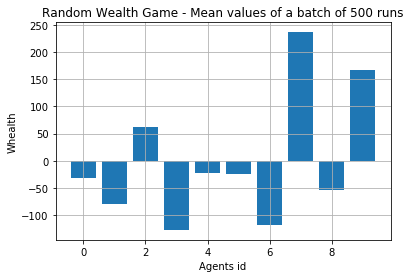

In [8]:
x = range(N)
plt.bar(mean_data[:,0], mean_data[:,1])
plt.xlabel('Agents id')
plt.ylabel('Whealth')
plt.title('Random Wealth Game - Mean values of a batch of ' + str(runs) + ' runs')
plt.grid(True)
plt.show()